In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"/home/albert/Work/git/cmclimate")
import cmclimate
import os
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

sys.path.insert(0,'/home/albert//Work/git/CMEMS-diags/')
from natl60_3_5_by_5_boxes import boxes
sys.path.insert(0,'/home/albert/lib/python/AJ-spectre/')
import plot_box as pb


In [2]:
ds_data = xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/TSG/ALL_horizontal_gradients.nc', chunks={'time': 1e7})

In [3]:
ds_natl_T = xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d01-y2013m09d30.1d_hgradT_large-n80-f0.1.nc',chunks={'time_counter':1})
ds_natl_S = xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d01-y2013m09d30.1d_hgradS_large-n80-f0.1.nc',chunks={'time_counter':1})
ds_natl_b = xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d01-y2013m09d30.1d_hgradb_large-n80-f0.1.nc',chunks={'time_counter':1})


In [4]:
GSbox=(-65+360,-60+360,37,42)
NEbox=(-15+360,-10+360,55,60)
ACbox=(-30+360,-25+360,31,36)
_lon=ds_data['lon'][:]
_lat=ds_data['lat'][:]

domainGS=(GSbox[0]<_lon)*(_lon<GSbox[1])*(GSbox[2]<_lat)*(_lat<GSbox[3])

whereGS=np.where(domainGS)

latsGS=_lat[whereGS[0][:]]
lonsGS=_lon[whereGS[0][:]]

gradTGS=ds_data['SST_LS'][whereGS[0][:]]
gradSGS=ds_data['SSS_LS'][whereGS[0][:]]
gradbGS=ds_data['SSb_LS'][whereGS[0][:]]

domainNE=(NEbox[0]<_lon)*(_lon<NEbox[1])*(NEbox[2]<_lat)*(_lat<NEbox[3])

whereNE=np.where(domainNE)

latsNE=_lat[whereNE[0][:]]
lonsNE=_lon[whereNE[0][:]]

gradTNE=ds_data['SST_LS'][whereNE[0][:]]
gradSNE=ds_data['SSS_LS'][whereNE[0][:]]
gradbNE=ds_data['SSb_LS'][whereNE[0][:]]

domainAC=(ACbox[0]<_lon)*(_lon<ACbox[1])*(ACbox[2]<_lat)*(_lat<ACbox[3])

whereAC=np.where(domainAC)

latsAC=_lat[whereAC[0][:]]
lonsAC=_lon[whereAC[0][:]]

gradTAC=ds_data['SST_LS'][whereAC[0][:]]
gradSAC=ds_data['SSS_LS'][whereAC[0][:]]
gradbAC=ds_data['SSb_LS'][whereAC[0][:]]

gradTGS_nonan=gradTGS[~np.isnan(gradTGS)]
gradSGS_nonan=gradSGS[~np.isnan(gradSGS)]
gradbGS_nonan=gradbGS[~np.isnan(gradbGS)]
gradTNE_nonan=gradTNE[~np.isnan(gradTNE)]
gradSNE_nonan=gradSNE[~np.isnan(gradSNE)]
gradbNE_nonan=gradbNE[~np.isnan(gradbNE)]
gradTAC_nonan=gradTAC[~np.isnan(gradTAC)]
gradSAC_nonan=gradSAC[~np.isnan(gradSAC)]
gradbAC_nonan=gradbAC[~np.isnan(gradbAC)]

/home/albert/anaconda2/lib/python2.7/site-packages/dask/core.py:306: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif type_arg is type(key) and arg == key:
/home/albert/anaconda2/lib/python2.7/site-packages/dask/core.py:306: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif type_arg is type(key) and arg == key:


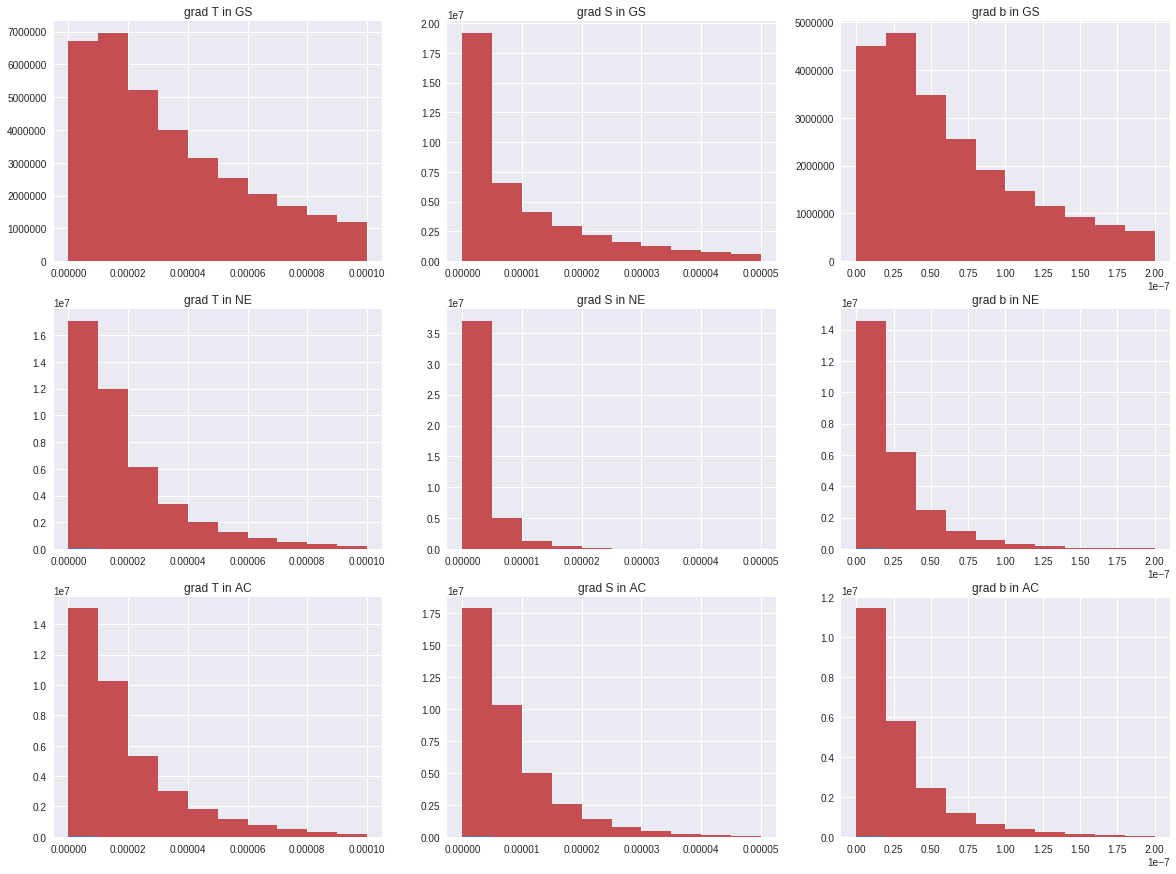

In [5]:
fig = plt.figure(figsize=(20.0, 15.0))

for box in boxes:
    
    gradT=ds_natl_T['vohgradb'][:,box.jmin:box.jmax,box.imin:box.imax].stack(z=('x', 'y','time_counter'))
    gradS=ds_natl_S['vohgradb'][:,box.jmin:box.jmax,box.imin:box.imax].stack(z=('x', 'y','time_counter'))
    gradb=ds_natl_b['vohgradb'][:,box.jmin:box.jmax,box.imin:box.imax].stack(z=('x', 'y','time_counter'))
    
    gradT_nonan=gradT[~np.isnan(gradT)]
    gradS_nonan=gradS[~np.isnan(gradS)]
    gradb_nonan=gradb[~np.isnan(gradb)]
    
    axes1 = fig.add_subplot(3, 3, (box.nb-1)*3+1)
    axes1.hist(gradT_nonan,range=(0,1e-4),color='r')
    if box.name == 'GS':
        axes1.hist(np.abs(gradTGS_nonan),range=(0,1e-4),color='b')
    if box.name == 'NE':
        axes1.hist(np.abs(gradTNE_nonan),range=(0,1e-4),color='b')
    if box.name == 'AC':
        axes1.hist(np.abs(gradTAC_nonan),range=(0,1e-4),color='b')
    plt.title('grad T in '+box.name)

    axes2 = fig.add_subplot(3, 3, (box.nb-1)*3+2)
    axes2.hist(gradS_nonan,range=(0,5e-5),color='r')
    if box.name == 'GS':
        axes2.hist(np.abs(gradSGS_nonan),range=(0,5e-5),color='b')
    if box.name == 'NE':
        axes2.hist(np.abs(gradSNE_nonan),range=(0,5e-5),color='b')
    if box.name == 'AC':
        axes2.hist(np.abs(gradSAC_nonan),range=(0,5e-5),color='b')
    plt.title('grad S in '+box.name)

    axes3 = fig.add_subplot(3, 3, (box.nb-1)*3+3)
    axes3.hist(gradb_nonan,range=(0,2e-7),color='r')
    if box.name == 'GS':
        axes3.hist(np.abs(gradbGS_nonan),range=(0,2e-7),color='b')
    if box.name == 'NE':
        axes3.hist(np.abs(gradbNE_nonan),range=(0,2e-7),color='b')
    if box.name == 'AC':
        axes3.hist(np.abs(gradbAC_nonan),range=(0,2e-7),color='b')
    plt.title('grad b in '+box.name)

plt.savefig('hist_grad_natl60-data.png')